In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ks_2samp
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

c:\Users\P\anaconda3\envs\SYLAS\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
folder_path = 'D:\\LSM_data_set\\'

file_name1 = 'Distribution_clusters_selfclassification_OM_synDDPM_synWGAN.csv'; result = pd.read_csv(os.path.join(folder_path, file_name1))


In [3]:
mapping = {
    'df_ddpm_count': 'synDDPM',
    'df_cGAN_count': 'synWGAN',
    'df_orig_count': 'original OM'   
}

result.columns = result.columns.to_series().replace(mapping).tolist()


In [4]:
result

,Cluster,synDDPM,synWGAN,original OM
0,8,9152390,3026836,4495014
1,1,4095908,6637393,13324224
2,7,4026311,4917169,9881845
3,0,3551777,5347374,10957716
4,3,3304422,182174,2619965
5,9,2522761,3878927,7980394
6,6,2304621,2976412,187585
7,2,1162805,3310886,789969
8,5,1160155,1349526,4093220
9,4,157697,7057462,15023125


In [5]:

column_sums = result.sum(axis=0)  # Sum of each column
normalized_result = (result.div(column_sums, axis=1)) * 100  # Divide each column by its sum

# Print the resulting DataFrame
# print(normalized_result)

In [6]:
normalized_result = normalized_result.iloc[:, 1:].copy()

In [7]:
normalized_result

,synDDPM,synWGAN,original OM
0,29.111723,7.824484,6.481349
1,13.028175,17.157910,19.212165
2,12.806802,12.711066,14.248608
3,11.297415,13.823162,15.799903
4,10.510634,0.470927,3.777721
5,8.024343,10.027172,11.506910
6,7.330488,7.694137,0.270478
7,3.698625,8.558764,1.139054
8,3.690196,3.488575,5.902004
9,0.501599,18.243804,21.661806


In [8]:
#normalized_result.sum()

In [9]:
normalized_result = normalized_result.sort_index()

result_df_transposed = normalized_result.T

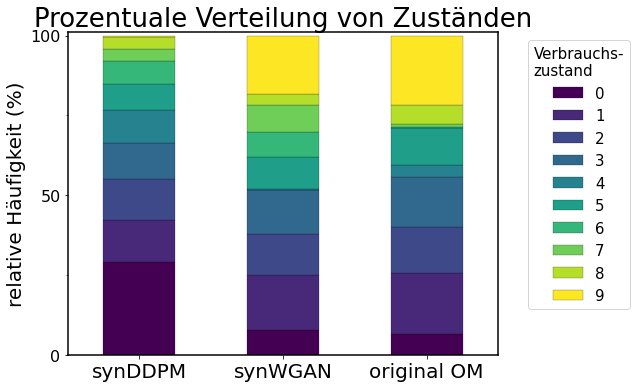

In [10]:

viridis = plt.cm.viridis

# Assuming result_df_transposed is your DataFrame
# Plot the stacked bar chart
ax = result_df_transposed.plot(kind='bar', stacked=True, figsize=(9, 5.5), colormap=viridis, edgecolor='black', linewidth=0.2)

# Set labels and title
ax.set_ylabel('relative Häufigkeit (%)', fontsize=20)  # Bigger font on y-axis label
ax.set_title('Prozentuale Verteilung von Zuständen', fontsize=26)  # Bigger title

# Customize legend
ax.legend(title='Verbrauchs-\nzustand', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, title_fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center', fontsize=20, fontweight='medium')

# Set y-axis major ticks at intervals of 50 with minor ticks at intervals of 25
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_minor_locator(plt.MultipleLocator(25))
ax.tick_params(axis='y', labelsize=16)  # Bigger font on y-axis tick labels

plt.ylim(0, 101)


# Change the thickness of the spines
ax.spines['top'].set_linewidth(1.5)    # Top spine
ax.spines['right'].set_linewidth(1.5)  # Right spine
ax.spines['bottom'].set_linewidth(1.5) # Bottom spine
ax.spines['left'].set_linewidth(1.5)   # Left spine

# Show the plot
plt.tight_layout()
plt.show()


In [27]:
reference_distribution = 'original OM'

In [31]:
result

,Cluster,synDDPM,synWGAN,original OM
0,8,9152390,3026836,4495014
1,1,4095908,6637393,13324224
2,7,4026311,4917169,9881845
3,0,3551777,5347374,10957716
4,3,3304422,182174,2619965
5,9,2522761,3878927,7980394
6,6,2304621,2976412,187585
7,2,1162805,3310886,789969
8,5,1160155,1349526,4093220
9,4,157697,7057462,15023125


In [44]:
reference_distribution = result['original OM']

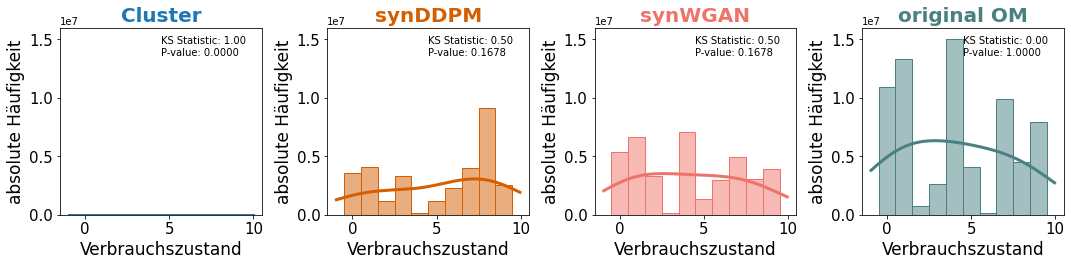

In [45]:
def plot_histograms_for_each_column(df, cluster_column, weight_column, color_list):
    num_columns = len(df.columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(15, 3.8))
    
    for i, column in enumerate(df.columns):
        sns.histplot(x=df[cluster_column], weights=df[column], discrete=True,
                     color=color_list[i], edgecolor=color_list[i],
                     kde=True, kde_kws={'cut': 0.5}, line_kws={'linewidth':3},
                     ax=axes[i])
        axes[i].set_title(column, fontsize=20, color=color_list[i], fontweight='bold')
        axes[i].set_ylabel('absolute Häufigkeit', fontsize=17)
        axes[i].set_ylim(0,1.6E7)
        
        # Set font sizes for labels
        axes[i].tick_params(axis='x', labelsize=15)
        axes[i].tick_params(axis='y', labelsize=15)
        axes[i].set_xlabel('Verbrauchszustand', fontsize=17)  # Change 'Your X Label' as needed
        
        # Perform KS test
        ks_statistic, p_value = ks_2samp(df[column], reference_distribution)
        axes[i].text(0.5, 0.9, f'KS Statistic: {ks_statistic:.2f}\nP-value: {p_value:.4f}',
                     horizontalalignment='left', verticalalignment='center',
                     transform=axes[i].transAxes)    
    
    plt.tight_layout()
    plt.show()

# Define your color list
color_list = ['tab:blue', '#d55e00', '#ee746b', '#4a8081']  # Add more colors as needed

# Assuming 'result' is your DataFrame
plot_histograms_for_each_column(result, 'Cluster', 'original OM', color_list)

In [50]:
def plot_histograms_for_each_column2(df, cluster_column, weight_column, color_list, reference_column):
    num_columns = len(df.columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(15, 3.8))
    
    for i, column in enumerate(df.columns):
        sns.histplot(x=df[cluster_column], weights=df[column], discrete=True,
                     color=color_list[i], edgecolor=color_list[i],
                     kde=True, kde_kws={'cut': 0.5}, line_kws={'linewidth':3},
                     ax=axes[i])
        axes[i].set_title(column, fontsize=20, color=color_list[i], fontweight='bold')
        axes[i].set_ylabel('relative Häufigkeit (%)', fontsize=17)
        axes[i].set_ylim(0,30)
        
        axes[i].yaxis.set_major_locator(MultipleLocator(10))
        
        # Set font sizes for labels
        axes[i].tick_params(axis='x', labelsize=15)
        axes[i].tick_params(axis='y', labelsize=15)
        axes[i].set_xlabel('Verbrauchszustand', fontsize=17)  # Change 'Your X Label' as needed
        
        # Perform KS test
        ks_statistic, p_value = ks_2samp(df[column], reference_distribution)
        axes[i].text(0.5, 0.9, f'KS Statistic: {ks_statistic:.2f}\nP-value: {p_value:.4f}',
                     horizontalalignment='right', verticalalignment='center',
                     transform=axes[i].transAxes)    
    
    plt.tight_layout()
    plt.show()

# Define your color list
color_list = ['#d55e00', '#ee746b', '#4a8081', 'tab:blue']  # Add more colors as needed

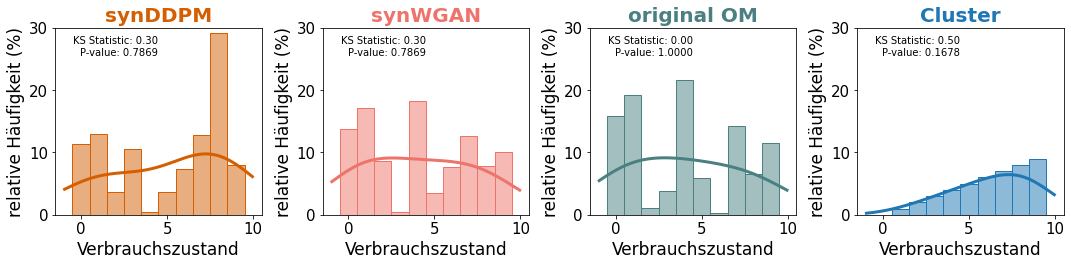

In [51]:
reference_distribution = results2['original OM']

result_cols = ['synDDPM', 'synWGAN', 'original OM']
results2 = (result[result_cols] / column_sums[result_cols].values) * 100
results2['Cluster'] = result['Cluster']

plot_histograms_for_each_column2(results2, 'Cluster', 'original OM', color_list, 'original OM')